# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
# Importamos las principales Librerías que utilizaremos para este proyecto
import numpy as np                                 # Operaciones matemáticas
import pandas as pd                                # Procesamiento de Datos
import matplotlib.pyplot as plt                    # Visualización de datos
import seaborn as sns                              # Visualización de datos
from tqdm.notebook import tqdm

## 1. Leer datos

In [2]:
df_train = pd.read_json('datasets/dataset_es_train.json', lines= True)
df_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


In [3]:
df_test = pd.read_json('datasets/dataset_es_test.json', lines= True)
df_test = pd.read_json('datasets/dataset_es_test.json', lines= True)

In [4]:
df_dev = pd.read_json('datasets/dataset_es_dev.json', lines= True)
df_dev

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless


In [5]:
list(df_train.columns)

['review_id',
 'product_id',
 'reviewer_id',
 'stars',
 'review_body',
 'review_title',
 'language',
 'product_category']

In [6]:
list(df_test.columns)

['review_id',
 'product_id',
 'reviewer_id',
 'stars',
 'review_body',
 'review_title',
 'language',
 'product_category']

In [7]:
list(df_dev.columns)

['review_id',
 'product_id',
 'reviewer_id',
 'stars',
 'review_body',
 'review_title',
 'language',
 'product_category']

Ejemplo review

In [8]:
df_train.iloc[35,4]

'Por más que busque, no le encuentro el agujero para meter las chuches. En las instrucciones dice que viene tapada con una pegatina transparente, pero la mia no la tiene.'

Valores Nulos

In [9]:
df_train.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

## 2. Análisis exploratorio

In [10]:
print(len(df_train.review_id.value_counts()))
print(len(df_test.review_id.value_counts()))
print(len(df_dev.review_id.value_counts()))

200000
5000
5000


`review_id` es un valor único para cada review

In [11]:
print(len(df_train.reviewer_id.value_counts()))
print(len(df_test.reviewer_id.value_counts()))
print(len(df_dev.reviewer_id.value_counts()))

179076
4988
4982


`reviewer_id` es un valor único para cada reviewer y existen reviewers que califican varios productos

In [12]:
print(len(df_train.product_id.value_counts()))
print(len(df_test.product_id.value_counts()))
print(len(df_dev.product_id.value_counts()))

150938
4959
4964


`product_id` es un valor unico para cada producto y cada producto puede tener multiples reviews

In [13]:
print(df_train.language.unique())
print(df_test.language.unique())
print(df_dev.language.unique())

['es']
['es']
['es']


En todos los datasets en único lenguaje es español

In [14]:
print(df_train.stars.unique())
print(df_test.stars.unique())
print(df_dev.stars.unique())

[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]


`stars` es la valoración del producto y va de 1 a 5 en todos los datasets

In [15]:
print(df_train.product_category.unique(), len(df_train.product_category.unique()))
print(df_test.product_category.unique(), len(df_test.product_category.unique()))
print(df_dev.product_category.unique(), len(df_dev.product_category.unique()))

['electronics' 'drugstore' 'wireless' 'shoes' 'home' 'luggage'
 'office_product' 'kitchen' 'pc' 'toy' 'industrial_supplies' 'furniture'
 'pet_products' 'sports' 'home_improvement' 'grocery' 'lawn_and_garden'
 'beauty' 'other' 'watch' 'automotive' 'book' 'apparel' 'video_games'
 'camera' 'baby_product' 'personal_care_appliances' 'jewelry'
 'digital_ebook_purchase' 'musical_instruments'] 30
['wireless' 'home' 'toy' 'digital_ebook_purchase' 'pc' 'lawn_and_garden'
 'sports' 'camera' 'home_improvement' 'apparel' 'automotive' 'drugstore'
 'electronics' 'other' 'beauty' 'office_product' 'furniture' 'kitchen'
 'shoes' 'video_games' 'personal_care_appliances' 'pet_products' 'book'
 'jewelry' 'watch' 'luggage' 'baby_product' 'industrial_supplies'
 'musical_instruments' 'grocery'] 30
['wireless' 'apparel' 'sports' 'home_improvement' 'beauty' 'home'
 'baby_product' 'pc' 'toy' 'book' 'personal_care_appliances' 'kitchen'
 'lawn_and_garden' 'pet_products' 'drugstore' 'office_product' 'furniture'
 'el

En `product_category` hay 30 categorias y estan presentes en los 3 datasets

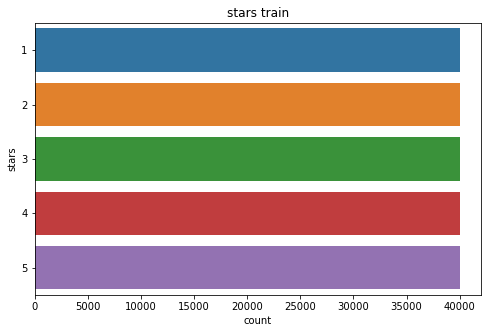

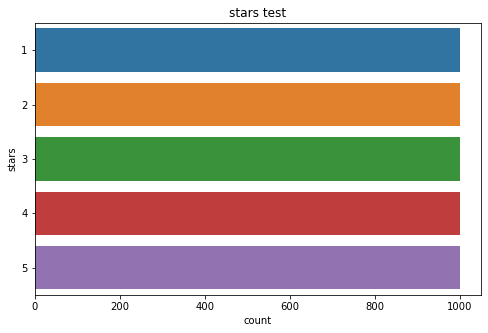

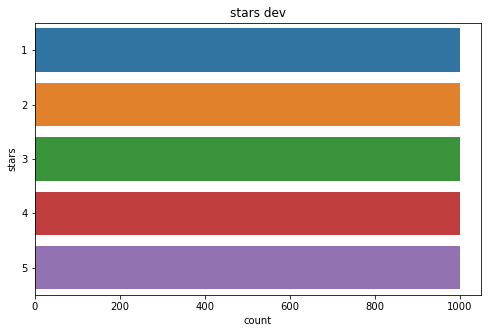

In [16]:
fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, y='stars')
plt.title('stars train')
plt.savefig('imagenes/stars_train.png', dpi=200)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_test, y='stars')
plt.title('stars test')
plt.savefig('imagenes/stars_test.png', dpi=200)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_dev, y='stars')
plt.title('stars dev')
plt.savefig('imagenes/stars_dev.png', dpi=200)
plt.show()

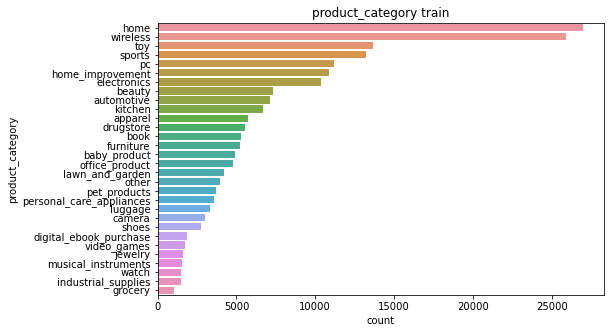

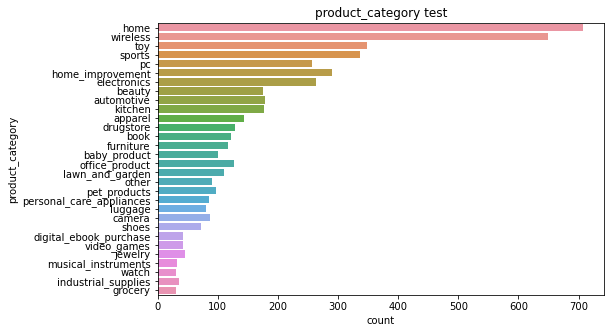

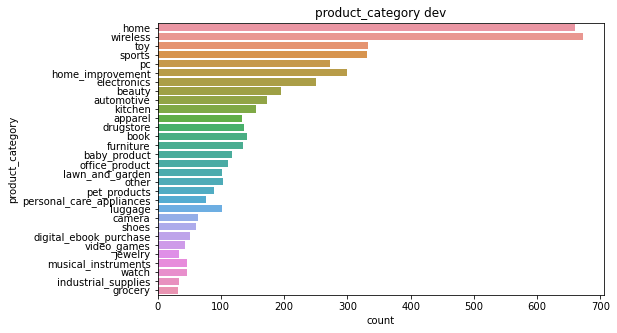

In [17]:
fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('product_category train')
plt.savefig('imagenes/product_category_train.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_test, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('product_category test')
plt.savefig('imagenes/product_category_test.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_dev, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('product_category dev')
plt.savefig('imagenes/product_category_dev.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

## 3. Procesamiento 

In [20]:
import spacy
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])

In [21]:
doc=nlp('No tiene agujero para rellenar la piñata')

In [22]:
doc

No tiene agujero para rellenar la piñata

In [23]:
def lemma(x):
    doc=nlp(x)
    titular=[token.lemma_ for token in doc]
    return titular

In [30]:
df_test['body_lemma']=df_test.review_body.apply(lambda x: lemma(x))

In [29]:
# df_train['body_lemma']=df_train.review_body.apply(lambda x: lemma(x))

In [ ]:
df_train

### 3.1 Normalizar
### 3.2 Lemmatizer
### 3.2 Vectorizar

## 4. Modelado como Regresión

## 5. Modelado como Clasificación